In [1]:
#Paso 1. conectarse con google colab
from google.colab import drive
drive.mount('/content/drive')
#!/usr/bin/env python

Mounted at /content/drive


In [2]:
#Importación de librerias
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [3]:
TRAIN_PATH = '/content/drive/MyDrive/DATASET/train'
SIZE = (240, 240)

In [4]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['freshpeppers', 'rottenpeppers', 'rottenoranges', 'freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana']


In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.10)
test_datagen = ImageDataGenerator(rescale=1./255) 

'''
Comments:
- ImageDataGenerator will resize all images to target_size
- x_col is the column where the images' names are
- y_col is the column where the labels are
- has_ext means that the images' names include a file extension, e.g. image_name.jpg
- Here you can change the targe_size to resize all images to different shapes.
Maybe larger images help in getting a better accuracy
'''
train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE, 
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 9922 images belonging to 8 classes.
Found 1099 images belonging to 8 classes.


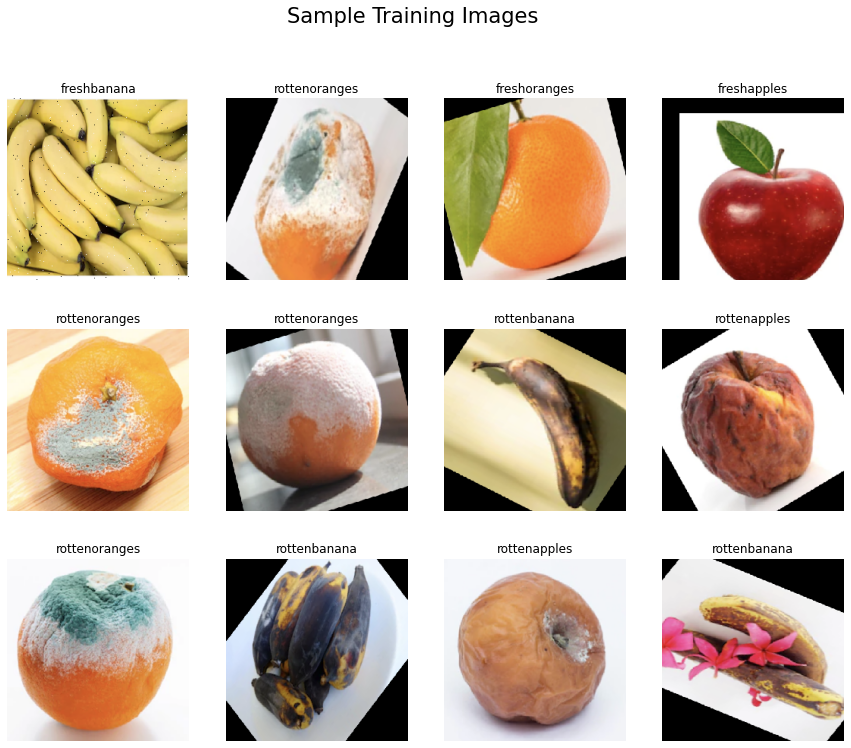

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 119, 119, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 119, 119, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 58, 58, 64)       

In [12]:
history = model.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset))


<ipython-input-12-368c2747024e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset))


Epoch 1/12
311/311 [==============================] - 2031s 7s/step - loss: 0.8817 - accuracy: 0.6838 - val_loss: 0.3975 - val_accuracy: 0.8744
Epoch 2/12
311/311 [==============================] - 71s 227ms/step - loss: 0.3347 - accuracy: 0.8805 - val_loss: 0.2276 - val_accuracy: 0.9272
Epoch 3/12
311/311 [==============================] - 70s 225ms/step - loss: 0.2145 - accuracy: 0.9228 - val_loss: 0.2185 - val_accuracy: 0.9308
Epoch 4/12
311/311 [==============================] - 71s 227ms/step - loss: 0.1605 - accuracy: 0.9442 - val_loss: 0.1900 - val_accuracy: 0.9354
Epoch 5/12
311/311 [==============================] - 72s 230ms/step - loss: 0.1431 - accuracy: 0.9497 - val_loss: 0.3224 - val_accuracy: 0.8872
Epoch 6/12
311/311 [==============================] - 74s 237ms/step - loss: 0.1323 - accuracy: 0.9525 - val_loss: 0.1100 - val_accuracy: 0.9672
Epoch 7/12
311/311 [==============================] - 71s 227ms/step - loss: 0.0904 - accuracy: 0.9681 - val_loss: 0.1422 - val_acc

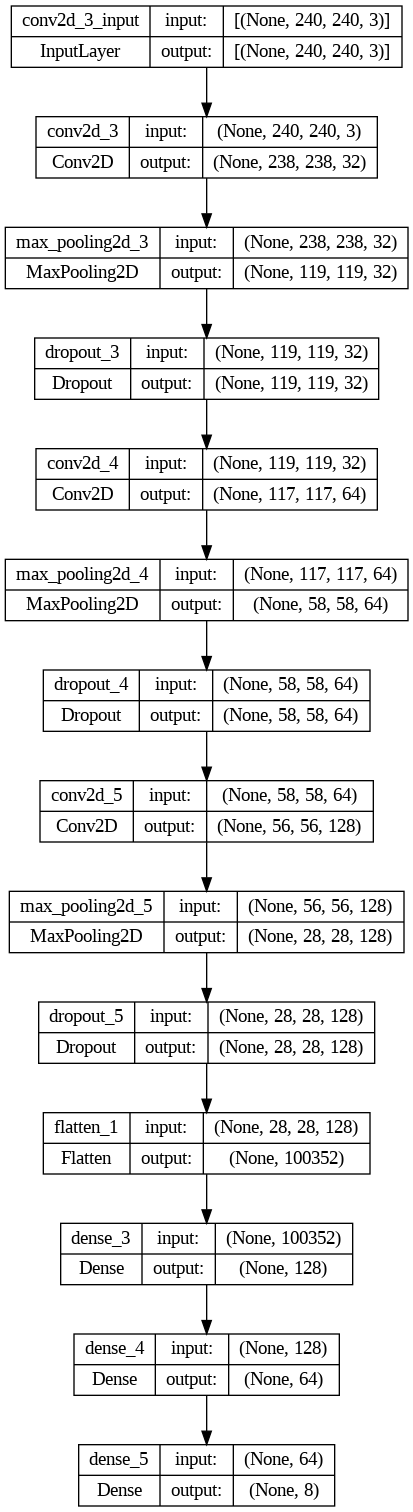

In [13]:
tf.keras.utils.plot_model(model, to_file="my_model2.png", show_shapes=True)

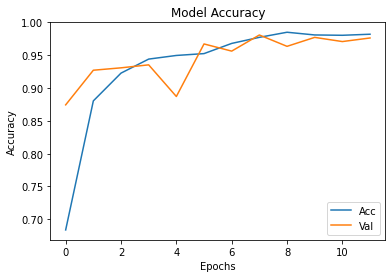

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

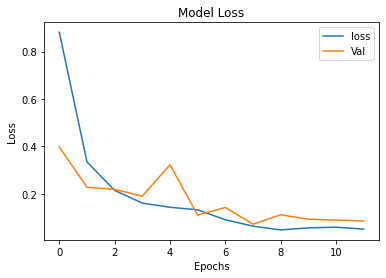

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [16]:
model.save("/content/drive/MyDrive/DATASET/model_v1.h5")

In [17]:
TEST_PATH = '/content/drive/MyDrive/DATASET/test'

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)

Found 2700 images belonging to 8 classes.
2700/2700 [==============================] - 662s 245ms/step - loss: 0.1347 - accuracy: 0.9593
accuracy test:  0.9592592716217041


<ipython-input-21-7a22ea274ed2>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)


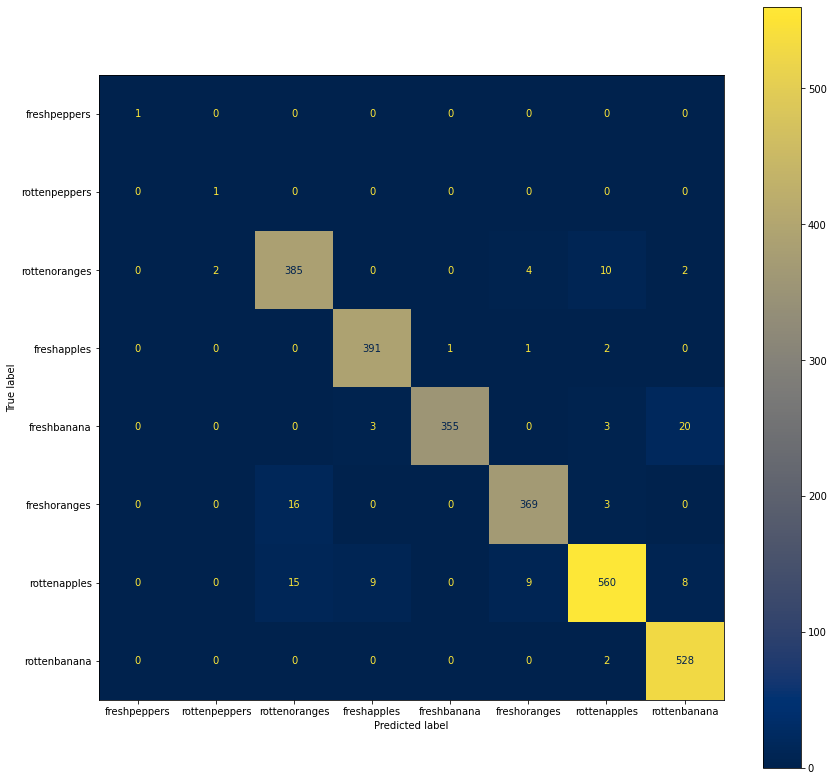

In [21]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# predecir
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, predicted_classes)
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_generator.classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(14,14))
disp.plot(ax=ax,cmap="cividis")